In [33]:
import scanpy as sc
import numpy as np

In [34]:
adata = sc.read_h5ad('./SEAAD_MTG_MERFISH.2024-02-13.h5ad')

In [35]:
adata

AnnData object with n_obs × n_vars = 366272 × 180
    obs: 'Donor ID', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in months', 'APOE4 Status', 'Primary Study Name', 'Secondary Study Name', '

In [36]:
ref_data = sc.read_h5ad('/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/true_sn_ref.h5ad')

In [37]:
ref_data

AnnData object with n_obs × n_vars = 87926 × 17954
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'genotype', 'month', 'sample', 'slice', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RNA_snn_res.0.2', 'seurat_clusters', 'celltype', 'fine', 'nCount_SCT', 'nFeature_SCT', 'datatype', 'region_abb'

In [38]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [20]:
ref_data

AnnData object with n_obs × n_vars = 87926 × 17954
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'genotype', 'month', 'sample', 'slice', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RNA_snn_res.0.2', 'seurat_clusters', 'celltype', 'fine', 'nCount_SCT', 'nFeature_SCT', 'datatype', 'region_abb'
    varm: 'fine'

In [39]:
import tacco as tc

In [ ]:
# Ensure there are no observations without non-zero variables
adata = adata[:, adata.X.sum(axis=0) > 0].copy()


# Ensure there are no observations without non-zero variables
ref_data = ref_data[:, ref_data.X.sum(axis=0) > 0].copy()

In [28]:
from scipy.sparse import csr_matrix

In [40]:
adata.layers["counts"] = adata.X.copy()

In [41]:
adata.X = csr_matrix(adata.X)

In [43]:
ref_data.X

<87926x17954 sparse matrix of type '<class 'numpy.float64'>'
	with 134376026 stored elements in Compressed Sparse Row format>

In [46]:
df = adata.obs.copy()

In [ ]:
# Ensure there are no observations without non-zero variables
adata = adata[adata.X.sum(axis=1) > 0, :].copy()
ref_data = ref_data[ref_data.X.sum(axis=1) > 0, :].copy()

# Ensure there are no observations without non-zero variables
adata = adata[:, adata.X.sum(axis=0) > 0].copy()
ref_data = ref_data[:, ref_data.X.sum(axis=0) > 0].copy()

In [56]:
'Mog' in adata.var_names

False

In [54]:


# Run the annotation function
tc.tl.annotate(adata, ref_data, annotation_key='fine', result_key='fine', 
               assume_valid_counts=True)

Starting preprocessing


KeyboardInterrupt: 

# Use of xiangmin data

In [57]:
xiangdata = sc.read_h5ad('/home1/jijh/st_project/downloads/mol_psy_data/downloads/MERFISH_Data.h5ad')

In [59]:
xiangdata

AnnData object with n_obs × n_vars = 432794 × 300
    obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine'
    uns: 'celltype_colors', 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'Normalized_Expression', 'RNA'
    obsp: 'connectivities', 'distances'

In [61]:
print(xiangdata.obs['sample'].unique())

['Z:/Lab/MERFISH_Imaging data/Kim_202201111602_..., 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_..., 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_..., 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_..., 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955..., ..., 'Z:/Lab/MERFISH_Imaging data/202209041036_2022..., 'Z:/Lab/MERFISH_Imaging data/202302031055_2023..., 'Z:/Lab/MERFISH_Imaging data/202302031055_2023..., 'Z:/Lab/MERFISH_Imaging data/202302031055_2023..., 'Z:/Lab/MERFISH_Imaging data/202302031055_2023...]
Length: 18
Categories (18, object): ['Z:/Lab/MERFISH_Imaging data/202204011403_2022..., 'Z:/Lab/MERFISH_Imaging data/202204011403_2022..., 'Z:/Lab/MERFISH_Imaging data/202204011403_2022..., 'Z:/Lab/MERFISH_Imaging data/202209041036_2022..., ..., 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_..., 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_..., 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_..., 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_...]


In [62]:

sample_dict = {sample: xiangdata[xiangdata.obs['sample'] == sample].copy() for sample in xiangdata.obs['sample'].unique()}

In [134]:
sample_dict

{'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_0/': AnnData object with n_obs × n_vars = 24291 × 300
     obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine'
     uns: 'celltype_colors', 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
     obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
     varm: 'PCs'
     layers: 'Normalized_Expression', 'RNA'
     obsp: 'connectivities', 'distances',
 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_1/': AnnData object with n_obs × n_vars = 23957 × 300
     obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volu

In [64]:
'Chat' in sample_dict['Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_2/'].var_names

True

In [65]:
adata = sample_dict['Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_2/'].copy()

In [99]:
from matplotlib import pyplot as plt
import seaborn as sns

In [98]:
adata

AnnData object with n_obs × n_vars = 14282 × 300
    obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine'
    uns: 'celltype_colors', 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap', 'gen_fine_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'Normalized_Expression', 'RNA'
    obsp: 'connectivities', 'distances'

In [107]:
mask = adata.raw[:, 'Chat'].X > 0
mask = mask.flatten()
adata.obs['celltype'] = adata.obs['cluster'].copy()
adata.obs['celltype'] = adata.obs['celltype'].astype('category')
adata.obs['celltype'] = adata.obs['celltype'].cat.add_categories(['ChN'])
adata.obs.loc[mask, 'celltype'] = 'ChN'

/public/home/jijh/micromamba/envs/TACCO_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


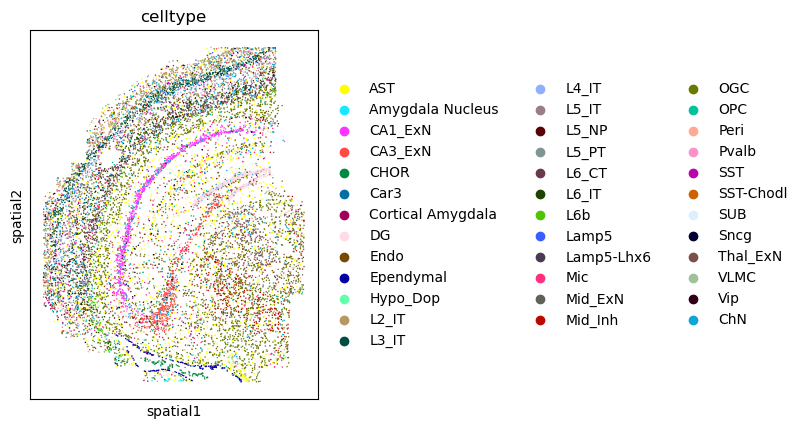

In [109]:
sc.pl.spatial(adata, color='celltype', spot_size=20, cmap='tab20')

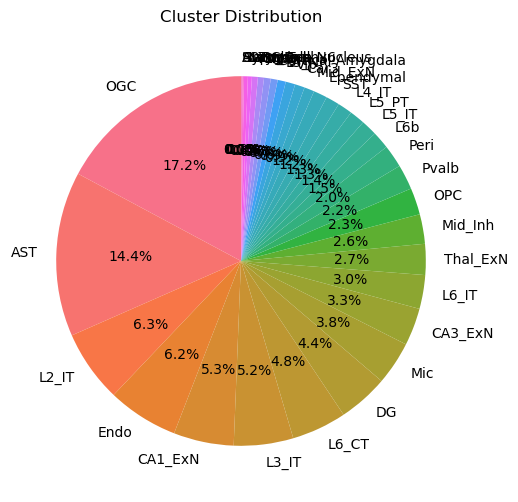

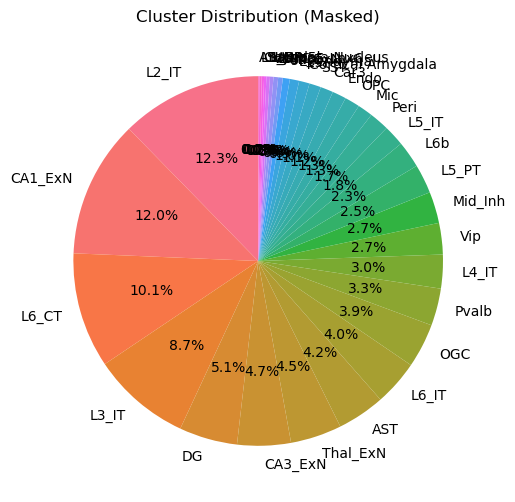

In [113]:
# Define a color map for the clusters
cluster_colors = adata.uns['cluster_colors']

plt.figure(figsize=(10, 6))
adata.obs['cluster'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=cluster_colors)
plt.ylabel('')
plt.title('Cluster Distribution')
plt.show()

plt.figure(figsize=(10, 6))
adata.obs['cluster'][mask].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=cluster_colors)
plt.ylabel('')
plt.title('Cluster Distribution (Masked)')
plt.show()

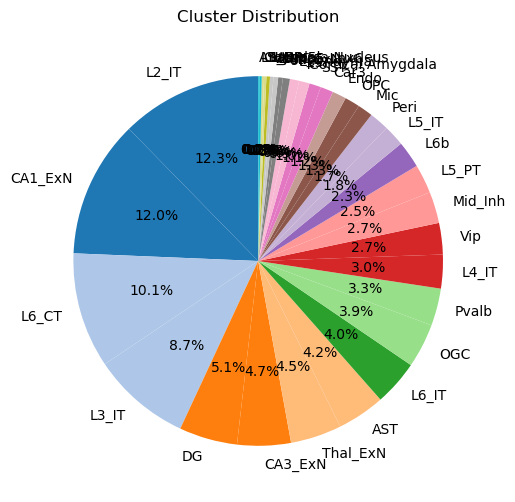

/public/home/jijh/micromamba/envs/TACCO_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


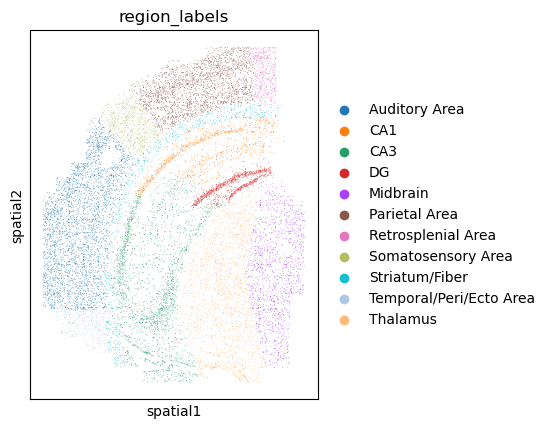

In [104]:
sc.pl.spatial(adata, color='region_labels', spot_size=10, cmap='tab20')

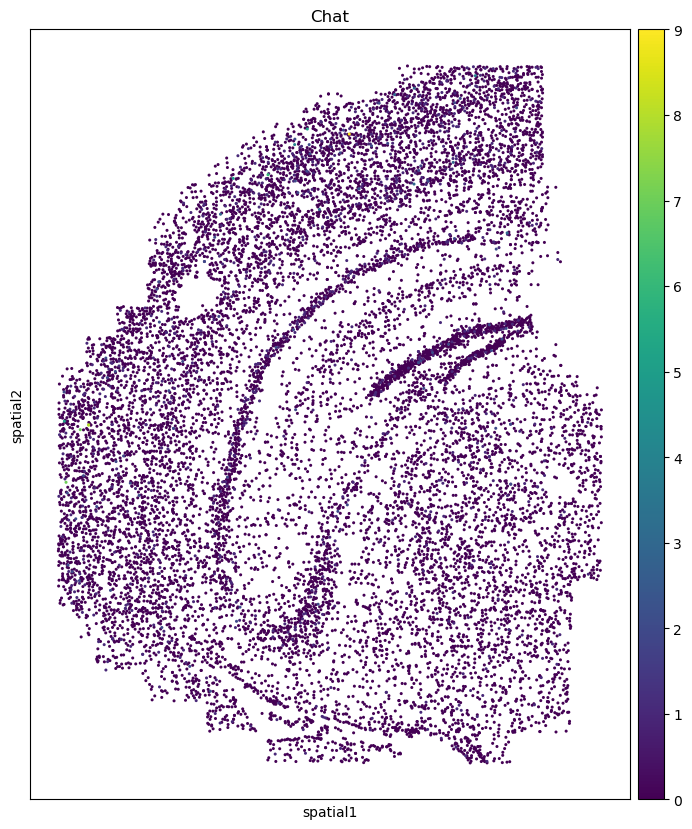

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))
sc.pl.spatial(adata, color='Chat', spot_size=20, ax=ax, show=False)
mask = adata.raw[:, 'Chat'].X > 0
mask = mask.flatten()
sns.scatterplot(x=adata.obs['center_x'][mask], y=adata.obs['center_y'][mask], color='red', ax=ax, s=20)
plt.show()

In [76]:
raw_xiangdata = xiangdata.raw.to_adata().copy()

In [79]:
raw_xiangdata.X = csr_matrix(raw_xiangdata.X)

In [80]:
raw_data_dict = {sample: raw_xiangdata[raw_xiangdata.obs['sample'] == sample].copy() for sample in raw_xiangdata.obs['sample'].unique()}

In [81]:
raw_test_data = raw_data_dict['Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_2/'].copy()

In [85]:
mask = raw_test_data[:, 'Chat'].X> 0

In [91]:
adata

AnnData object with n_obs × n_vars = 14282 × 300
    obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine'
    uns: 'celltype_colors', 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap', 'gen_fine_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'Normalized_Expression', 'RNA'
    obsp: 'connectivities', 'distances'

/public/home/jijh/micromamba/envs/TACCO_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/home/jijh/micromamba/envs/TACCO_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


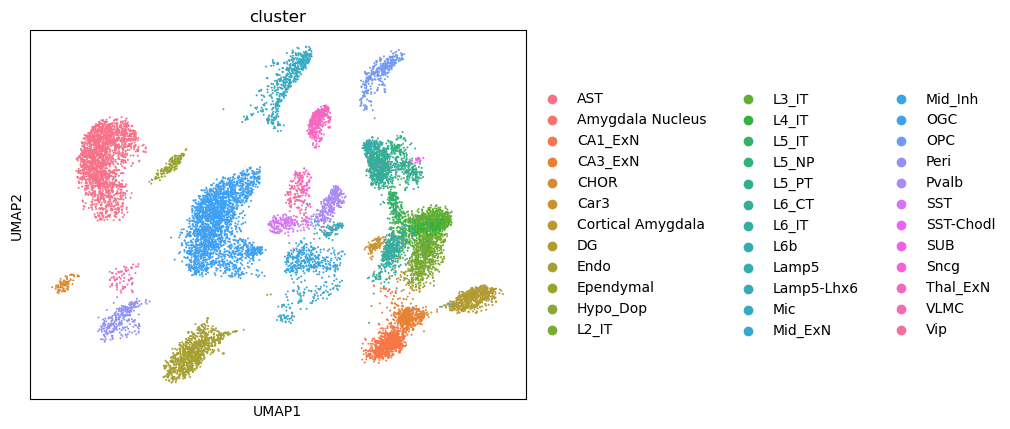

In [92]:
sc.pl.umap(adata, color='cluster')

In [114]:
adata

AnnData object with n_obs × n_vars = 14282 × 300
    obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine', 'celltype'
    uns: 'celltype_colors', 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap', 'gen_fine_colors', 'region_labels_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'Normalized_Expression', 'RNA'
    obsp: 'connectivities', 'distances'

/public/home/jijh/micromamba/envs/TACCO_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/home/jijh/micromamba/envs/TACCO_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


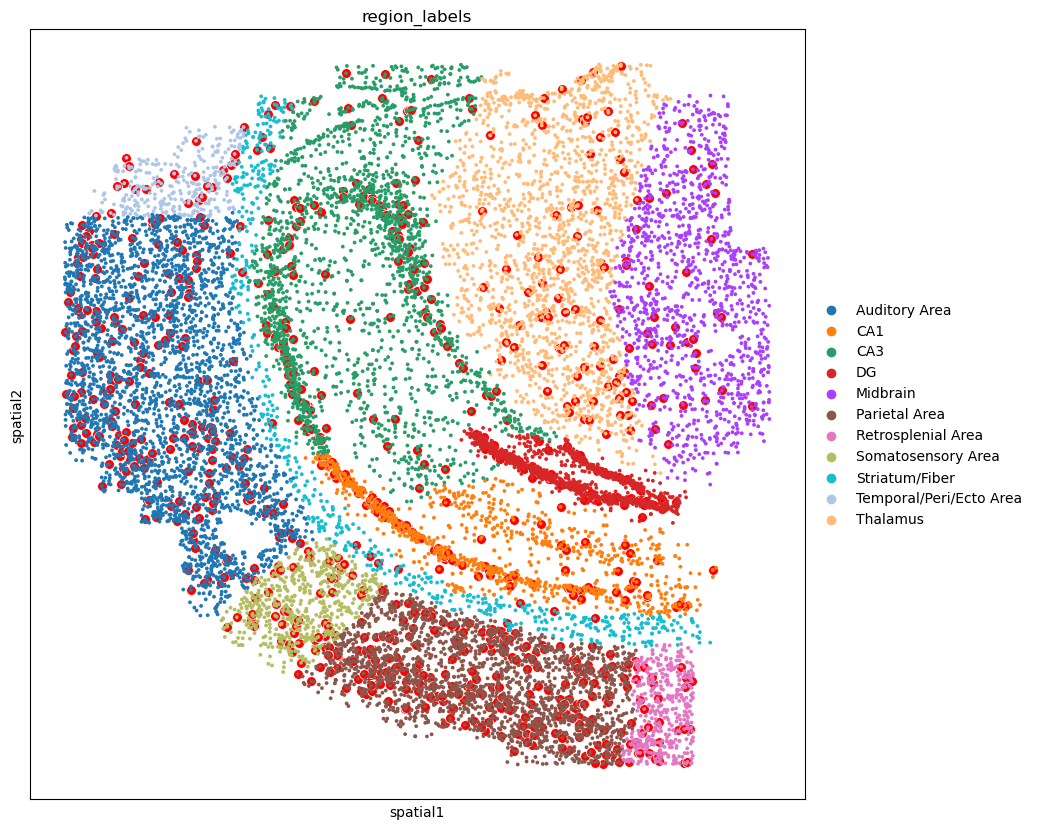

In [126]:
fig, ax = plt.subplots(figsize=(10, 10))

mask = adata.raw[:, 'Chat'].X > 0
mask = mask.flatten()

# Overlay "Chat" points in red with larger size
sns.scatterplot(x=adata[mask].obsm['spatial'][:,0], y=adata[mask].obsm['spatial'][:, 1], color='red', ax=ax, s=50)

# Plot all points in lightgrey
sc.pl.embedding(adata, basis='spatial',color='region_labels', s=30, ax=ax, show=False)




plt.show()

In [127]:
plaquedata = sc.read_h5ad('/home1/jijh/st_project/downloads/mol_psy_data/downloads/Plaques_Object.h5ad')

In [129]:
plaque_dict = {sample: plaquedata[plaquedata.obs['sample'] == sample].copy() for sample in plaquedata.obs['sample'].unique()}

In [130]:
plaque_dict

{'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_1/': AnnData object with n_obs × n_vars = 1061 × 300
     obs: 'sample', 'imagecol', 'imagerow', 'fov', 'volume', 'cell_cov', 'batch', 'counts', 'ratio', 'coarse_gen', 'coarse_batch', 'region_labels', 'gen', 'plaque_1', 'region_labels_coarse', 'gen_old'
     var: 'mean', 'std'
     uns: 'gen_colors', 'region_labels_colors', 'spatial'
     obsm: 'spatial'
     layers: 'Log_Normalized_Counts', 'Normalized_Counts',
 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_3/': AnnData object with n_obs × n_vars = 1086 × 300
     obs: 'sample', 'imagecol', 'imagerow', 'fov', 'volume', 'cell_cov', 'batch', 'counts', 'ratio', 'coarse_gen', 'coarse_batch', 'region_labels', 'gen', 'plaque_1', 'region_labels_coarse', 'gen_old'
     var: 'mean', 'std'
     uns: 'gen_colors', 'region_labels_colors', 'spatial'
     obsm: 'spatial'
     layers: 'Log_Normalized_Counts

In [137]:
sample_dict.keys()

dict_keys(['Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_2/', 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_3/', 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_2/', 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/regi

In [141]:
# Check for intersection of keys between sample_dict and plaque_dict
intersection_keys = set(sample_dict.keys()).intersection(plaque_dict.keys())
print(intersection_keys)

intersection_keys = list(intersection_keys)

{'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/202302031055_20230203TREM5xFAD-VZG171x04_VMSC05201/region_1/', 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/202209041036_20220904-5xFAD-TREM2-AnteHip-300x05_VMSC00101/region_3/', 'Z:/Lab/MERFISH_Imaging data/202302031055_20230203TREM5xFAD-VZG171x04_VMSC05201/region_0/', 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/202209041036_20220904-5xFAD-TREM2-AnteHip-300x05_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_3/'}


In [142]:
plaque_test = plaque_dict[intersection_keys[0]].copy()

In [151]:
from scipy.spatial import cKDTree

In [152]:
adata = sample_dict[intersection_keys[0]].copy()

In [153]:
mask = adata.raw[:, 'Chat'].X > 0
mask = mask.flatten()
adata.obs['celltype'] = adata.obs['cluster'].copy()
adata.obs['celltype'] = adata.obs['celltype'].astype('category')
adata.obs['celltype'] = adata.obs['celltype'].cat.add_categories(['ChN'])
adata.obs.loc[mask, 'celltype'] = 'ChN'

In [154]:
plaque_test

plaque_test_tree = cKDTree(plaque_test.obsm['spatial'])
idx, dist = plaque_test_tree.query(adata.obsm['spatial'], k=1)
adata.obs['distance_to_plaque'] = dist

cell_in_reg_0_39_Z_0_fov_1613_6905876    214
cell_in_reg_0_18_Z_0_fov_1919_8941033    489
cell_in_reg_0_87_Z_0_fov_1920_1890509    489
cell_in_reg_0_90_Z_0_fov_1953_5588687    489
cell_in_reg_0_3_Z_0_fov_1968_2840385     547
                                        ... 
cell_in_reg_0_9_Z_0_fov_2142_1110515     779
cell_in_reg_0_56_Z_0_fov_2146_2159279    769
cell_in_reg_0_62_Z_0_fov_2146_2032572    769
cell_in_reg_0_27_Z_0_fov_2158_5135678    780
cell_in_reg_0_7_Z_0_fov_2159_6348906     780
Name: distance_to_plaque, Length: 23598, dtype: int64